In [10]:
import pandas as pd
from sklearn import naive_bayes
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_excel("./data/dados_cerveja_nota.xlsx")

## Definição da classe
dados["aprovado"] = dados["nota"] >= 5

In [5]:
dados["aprovado"] 

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
Name: aprovado, dtype: bool

### Naive Bayes

In [3]:
NB = naive_bayes.GaussianNB()

NB.fit(dados[["cerveja"]], dados["aprovado"]) #Aprendi

NB_predict = NB.predict(dados[["cerveja"]]) #Fiz a predição - array de True e False
NB_proba = NB.predict_proba(dados[["cerveja"]]) #Probabilidade de predição

In [4]:
# Probabilidade de predição de ser classificado como: Não aprovado (0) e Aprovado (1)
NB_proba

array([[9.98616189e-01, 1.38381133e-03],
       [9.98616189e-01, 1.38381133e-03],
       [9.92746772e-01, 7.25322814e-03],
       [9.60133233e-01, 3.98667669e-02],
       [7.97223228e-01, 2.02776772e-01],
       [7.97223228e-01, 2.02776772e-01],
       [3.73209836e-01, 6.26790164e-01],
       [7.72029979e-02, 9.22797002e-01],
       [7.72029979e-02, 9.22797002e-01],
       [1.07880350e-02, 9.89211965e-01],
       [1.31714470e-03, 9.98682855e-01],
       [1.31714470e-03, 9.98682855e-01],
       [1.47952552e-04, 9.99852047e-01],
       [1.47952552e-04, 9.99852047e-01],
       [1.47952552e-04, 9.99852047e-01]])

### A linha de corte por padrão é 50%, mas posso mecher nessa probabilidade

In [9]:
### Fazendo um novo corte (apenas acima de 80% vai ser aprovado no modelo)
NB_predict_2 = NB.predict_proba(dados[["cerveja"]])[:,1] > 0.7

#[:,1] -> pegar todas as linhas, apenas da coluna 1 (Aprovado)

### Matriz de confusão
NB_matriz = metrics.confusion_matrix(dados["aprovado"], NB_predict_2)
NB_matriz = pd.DataFrame(NB_matriz, 
                         index = ["False", "True"],
                         columns=["False", "True"])

print("Matriz:\n", NB_matriz)

### Métricas
NB_acuracia = metrics.accuracy_score(dados["aprovado"], NB_predict_2)
print("Acurácia:", NB_acuracia)

NB_precisao = metrics.precision_score(dados["aprovado"], NB_predict_2)
print("Precisão:", NB_precisao)

NB_recall = metrics.recall_score(dados["aprovado"], NB_predict_2)
print("Sensibilidade:", NB_recall)

Matriz:
        False  True
False      6     0
True       1     8
Acurácia: 0.9333333333333333
Precisão: 1.0
Sensibilidade: 0.8888888888888888


### Curva ROC

In [12]:
roc_curve = metrics.roc_curve(dados["aprovado"], NB_proba[:,1])
roc_curve

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16666667, 0.33333333, 0.66666667, 1.        ]),
 array([0.        , 0.33333333, 0.55555556, 0.66666667, 0.88888889,
        0.88888889, 1.        , 1.        , 1.        ]),
 array([       inf, 0.99985205, 0.99868286, 0.98921197, 0.922797  ,
        0.62679016, 0.20277677, 0.00725323, 0.00138381]))

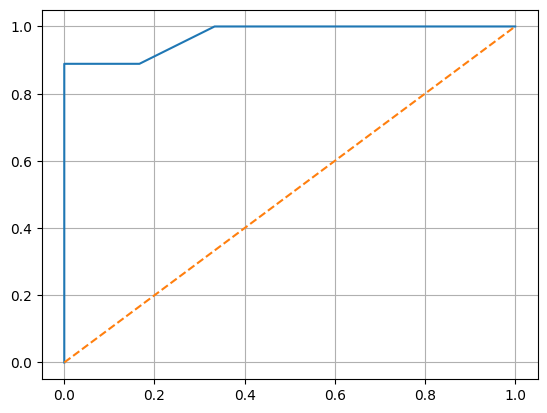

In [15]:
plt.plot(roc_curve[0], roc_curve[1])
plt.plot([0,1], [0,1], "--")
plt.grid(True)

In [17]:
### Área da curva ROC
roc_auc = metrics.roc_auc_score(dados["aprovado"], NB_proba[:,1])
roc_auc

np.float64(0.9722222222222223)